In [9]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
root=os.path.join("./cats_and_dogs_filtered/cats_and_dogs_filtered/")

In [12]:
root_train=os.path.join(root,"train")
root_val=os.path.join(root,"validation")

print(f"Size training cats {len(os.listdir(os.path.join(root_train,'cats')))}")
print(f"Size training dogs {len(os.listdir(os.path.join(root_train,'dogs')))}")
print(f"Size test cats {len(os.listdir(os.path.join(root_val,'cats')))}")
print(f"Size training dogs {len(os.listdir(os.path.join(root_val,'dogs')))}")

Size training cats 1000
Size training dogs 1000
Size test cats 500
Size training dogs 500


### Explore dataset

(374, 500, 3)
(280, 300, 3)
(499, 489, 3)
(499, 403, 3)
(200, 296, 3)
(343, 349, 3)
(386, 500, 3)
(399, 253, 3)
(174, 215, 3)
(374, 400, 3)
(350, 499, 3)
(332, 499, 3)
(374, 500, 3)
(410, 431, 3)
(500, 374, 3)
(356, 299, 3)
(374, 500, 3)
(308, 409, 3)
(261, 350, 3)
(270, 231, 3)


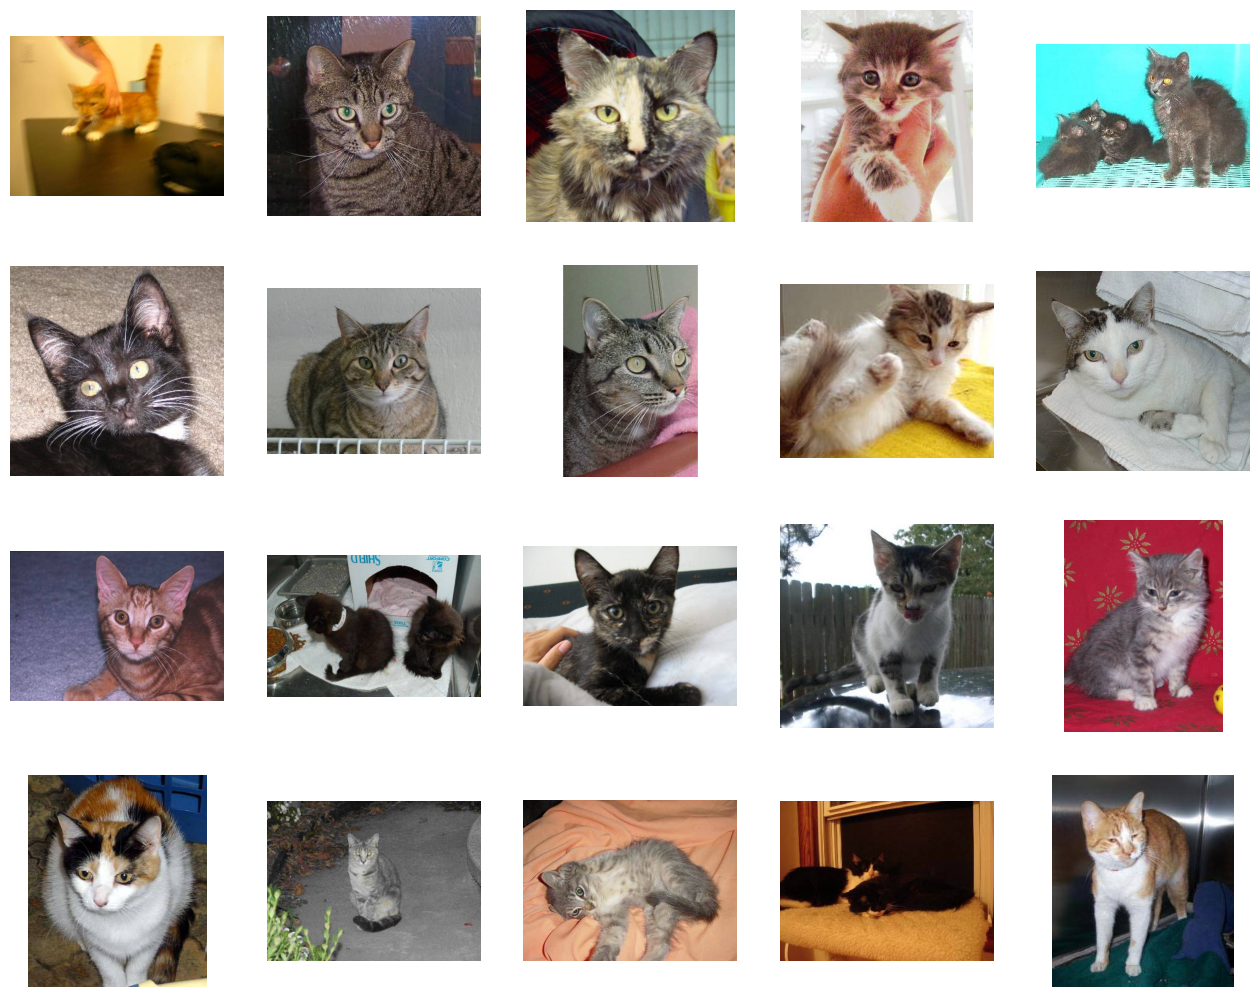

In [13]:
list_cats=os.listdir(os.path.join(root_train,'cats'))
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(4 * 4, 4 * 4)
for i in range(0,20):
    sp = plt.subplot(5,5, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    root=os.path.join(root_train,'cats',list_cats[i])
    img = mpimg.imread(root) #Convert image as an array suppose numpy 
    print(img.shape)
    plt.imshow(img)
    
plt.show()


In [18]:
from tensorflow.keras.optimizers import RMSprop,Adam
def create_model():
    layers=tf.keras.layers

    model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(280,activation="relu"),
        layers.Dense(48,activation="relu"),
        layers.Dense(1,activation="sigmoid")
        
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.003),loss="binary_crossentropy",metrics=["accuracy"])
    model.summary()
    return model

In [19]:
new_model=create_model()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

"""
rotation_range is a value in degrees (0–180) within which to randomly rotate pictures.
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range is for randomly applying shearing transformations.
zoom_range is for randomly zooming inside pictures.
horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
"""

gen_training=ImageDataGenerator(rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

gen_validation=ImageDataGenerator(rescale=1/255)

training_dataset=gen_training.flow_from_directory(
    root_train,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
    
)

validation_dataset=gen_validation.flow_from_directory(
    root_val,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history_model_nomal_model=new_model.fit(training_dataset,steps_per_epoch=100,epochs=10,validation_data=validation_dataset,validation_steps=50,verbose=2)

Epoch 1/10
100/100 - 11s - loss: 1.3063 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000 - 11s/epoch - 109ms/step
Epoch 2/10
100/100 - 10s - loss: 0.7047 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5000 - 10s/epoch - 101ms/step
Epoch 3/10
100/100 - 10s - loss: 0.7218 - accuracy: 0.5155 - val_loss: 0.7013 - val_accuracy: 0.5000 - 10s/epoch - 99ms/step
Epoch 4/10
100/100 - 10s - loss: 0.7021 - accuracy: 0.4825 - val_loss: 0.6926 - val_accuracy: 0.5030 - 10s/epoch - 97ms/step
Epoch 5/10
100/100 - 10s - loss: 0.6998 - accuracy: 0.4980 - val_loss: 0.6917 - val_accuracy: 0.5100 - 10s/epoch - 97ms/step
Epoch 6/10
100/100 - 10s - loss: 0.7177 - accuracy: 0.5315 - val_loss: 0.6900 - val_accuracy: 0.5270 - 10s/epoch - 98ms/step
Epoch 7/10
100/100 - 10s - loss: 0.7090 - accuracy: 0.5335 - val_loss: 0.6878 - val_accuracy: 0.5680 - 10s/epoch - 98ms/step
Epoch 8/10
100/100 - 10s - loss: 0.7122 - accuracy: 0.5585 - val_loss: 0.6883 - val_accuracy: 0.5350 - 10s/epoch - 98ms/ste

### Using an existing model(inception v3)

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

dir_weights="./weights_for_training/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

#Include top are the dense layers that we dont want to incluide in the model since we eill be fine tuning with our own daense layers
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                              include_top=False,
                              weights=None)

pre_trained_model.load_weights(dir_weights)

for layer in pre_trained_model.layers:
    layer.trainable=False #Freeze convulutional layers
    
    
#Lets print out model 

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_102 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_102[0][0]']             
 ormalization)                                                                                    
                                                                                       

### Concatenate CNN layers to out own DNN 

In [23]:
#We will use a CNN layers until not the last layer because this may be to specilaized
#We will use layers before that
last_layer=pre_trained_model.get_layer("mixed7")
print("last leyer output shape: ",last_layer.output_shape)
last_output=last_layer.output

last leyer output shape:  (None, 7, 7, 768)


In [24]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

#We are going to use now the sequential api

x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation="sigmoid")(x)
print(pre_trained_model.input)
model_transfer=Model(pre_trained_model.input,x)

model_transfer.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_102 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_102[0][0]']             
 ormalization)                        

In [25]:
model_transfer.compile(optimizer=RMSprop(learning_rate=0.0001),
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

In [26]:
history_trasfer=model_transfer.fit(training_dataset,steps_per_epoch=100,epochs=10,validation_data=validation_dataset,validation_steps=50,verbose=2)

Epoch 1/10
100/100 - 34s - loss: 0.3317 - accuracy: 0.8705 - val_loss: 0.1127 - val_accuracy: 0.9540 - 34s/epoch - 339ms/step
Epoch 2/10
100/100 - 30s - loss: 0.2267 - accuracy: 0.9085 - val_loss: 0.1439 - val_accuracy: 0.9480 - 30s/epoch - 303ms/step
Epoch 3/10
100/100 - 31s - loss: 0.2041 - accuracy: 0.9245 - val_loss: 0.1121 - val_accuracy: 0.9600 - 31s/epoch - 308ms/step
Epoch 4/10
100/100 - 31s - loss: 0.2078 - accuracy: 0.9335 - val_loss: 0.1057 - val_accuracy: 0.9590 - 31s/epoch - 315ms/step
Epoch 5/10
100/100 - 32s - loss: 0.1782 - accuracy: 0.9390 - val_loss: 0.1028 - val_accuracy: 0.9590 - 32s/epoch - 316ms/step
Epoch 6/10
100/100 - 32s - loss: 0.1735 - accuracy: 0.9435 - val_loss: 0.1230 - val_accuracy: 0.9610 - 32s/epoch - 318ms/step
Epoch 7/10
100/100 - 32s - loss: 0.1693 - accuracy: 0.9430 - val_loss: 0.1065 - val_accuracy: 0.9650 - 32s/epoch - 316ms/step
Epoch 8/10
100/100 - 31s - loss: 0.1610 - accuracy: 0.9430 - val_loss: 0.1382 - val_accuracy: 0.9590 - 31s/epoch - 311